# Practice Question

## GMM

1.1. Build a GMM on the Iris data (first 2 features) and tune your model for different covariance types.

1.2. Plot the results as shown in the hands on.

## LDA

2.1. Perform Linear Discriminant Analysis on the Iris Data (first 2 features). 

2.2. Plot the results as shown in the hands on.

In [5]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [17]:
W = pd.DataFrame(X)
W.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [29]:
for m in ('full','diag','spherical','tied'):
    clf = GaussianMixture(n_components=3, covariance_type=m)  

    clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
# fit
    clf.fit(X_train, y_train)
# predict
    pred_train = clf.predict(X_train)
    pred = clf.predict(X_test)
#evaluate
    print ('Train accuracy = ' + str(accuracy_score(y_train, pred_train)))
    print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Train accuracy = 0.658333333333
Test accuracy = 0.533333333333
Train accuracy = 0.791666666667
Test accuracy = 0.766666666667
Train accuracy = 0.775
Test accuracy = 0.8
Train accuracy = 0.766666666667
Test accuracy = 0.8


In [12]:
colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

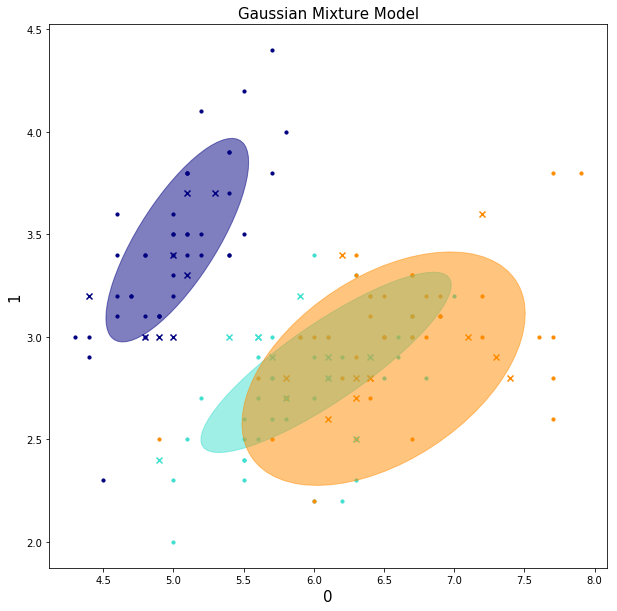

In [28]:
# Model
estimator = GaussianMixture(n_components=3,
                   covariance_type='full', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(10,10))
# plt.ylim([-1,3])
# plt.xlim([11,15])
plt.xlabel('0', fontsize=15)
plt.ylabel('1', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data[:,0], train_data[:,1], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data[:,0], test_data[:,1], marker='x', color=color)

plt.title('Gaussian Mixture Model', fontsize=15)

plt.show()

In [20]:
train_data[:,0]

array([ 5.1,  5.4,  5. ,  5. ,  5. ,  5.1,  5.1,  5.4,  5. ,  4.6,  5.7,
        5.2,  4.6,  4.9,  5.2,  4.3,  4.8,  4.8,  4.9,  4.6,  4.9,  5.8,
        5.4,  5.5,  4.7,  4.6,  4.8,  5.7,  5.1,  4.4,  4.7,  5.4,  5.5,
        5. ,  5.1,  5.4,  4.5,  4.8,  5.1,  5.2,  5. ,  4.4])